# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Reading csv file into a dataframe

In [3]:
file = 'product_sales.csv'
df = pd.read_csv(file)

In [4]:
df.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


## 3. Checking for shape of the dataset

In [5]:
df.shape

(15000, 8)

As we can see, the dataset contains 15000 rows and 8 columns

## 4. Checking data type, null values and missing values in all columns

All columns do not have missing values except the 'revenue' column and data type is accurate with the description for each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [8]:
# Checking 'week' column
df['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

There is no missing values in the 'week' column, so no cleaning is needed

In [9]:
# Checking 'sales_method' column
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

There is no missing values in the 'sales_method' column but the inconsistency before cleaning.

In [10]:
# Using replace function to make this column become consistent
df[['sales_method']] = df[['sales_method']].replace(['em + call', 'email'], ['Email + Call', 'Email'])

In [11]:
df[['sales_method']].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
dtype: int64

After cleaning, the 'sales_method' column is consistent with 3 method of Email, Call and Email + Call

In [12]:
# For this column, I will check for duplicated values
df['customer_id'].duplicated().any()

False

There is no duplicated in 'customer_id' column, so no cleaning is needed

In [13]:
# Checking missing values for this column
df['nb_sold'].isnull().value_counts()

False    15000
Name: nb_sold, dtype: int64

After checking, there is no missing values in 'nb_sold' column, so no cleaning is needed

There is 1074 missing values before cleaning in 'revenue' column

In [14]:
# Checking number of missing values
df['revenue'].isnull().value_counts()

False    13926
True      1074
Name: revenue, dtype: int64

In [15]:
# Replacing the mean value for the missing values in the column
df['revenue'].fillna(df['revenue'].mean().round(2), inplace=True)

In [16]:
# Checking again to confirm the replacement
df['revenue'].isnull().value_counts()

False    15000
Name: revenue, dtype: int64

In [17]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934589,4.965933,24.990867
std,1.656420,1.812213,45.705474,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,91.865000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


The company was established in 1984 but there are two inappropriate values of 47 and 63 which are longer than the period from the establishment until today. Because there are only 2 values on 15000 values, it does not have a significant impact on the result at all, so i decided to keep it and no cleaning is needed.

In [18]:
df['years_as_customer'].value_counts()

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36       4
39       3
38       2
37       2
63       1
47       1
Name: years_as_customer, dtype: int64

In [19]:
df[df['years_as_customer'] == 47]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [20]:
df[df['years_as_customer'] == 63]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California


The 'nb_site_visits' column is fine, no cleaning is needed

In [21]:
df['nb_site_visits'].value_counts()

25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

The 'state' column is fine, no cleaning is needed

In [22]:
df['state'].isnull().value_counts()

False    15000
Name: state, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [24]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934589,4.965933,24.990867
std,1.656420,1.812213,45.705474,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,91.865000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


## 5. Analyzing the data

The below graph shows the number of clients in each approach of sales, as we can see, there are over 7000 clients by the method of 'Email' which is higher than the 'Email + Call' method about 2.5 times and is the highest number among 3 methods. The 'Call' method has the number of customers of nearly 5000 people which is doubled the number of customers in the 'Call' method.
From the given graph, we have known that the majority of our clients are coming from 'Email' and 'Call' method. However, I could not draw any conclusion about the best sales method just based on only this graph. Further analysis is needed in the next steps.

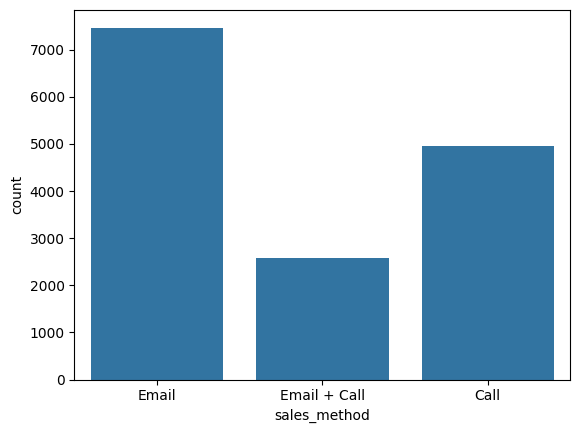

In [25]:
sns.countplot(data=df, x='sales_method')
plt.show()

The histogram illustrates the distribution of revenue for all 3 methods. The majority of the revenue are ranging from 30 to 200, the revenue over 200 could be considered as outliers.

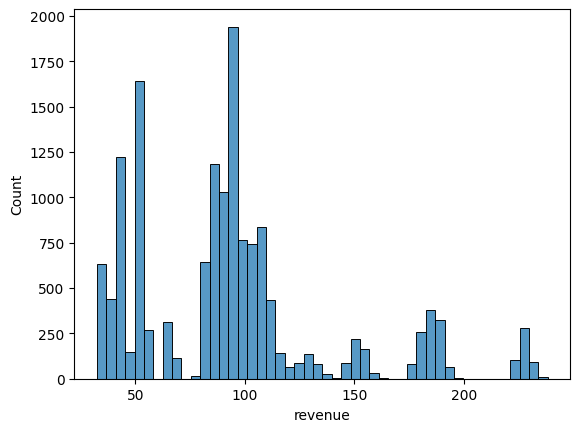

In [26]:
sns.histplot(data=df, x='revenue')
plt.show()

Based on the given multiple boxplots, we can see that the majority of revenue of 'Email + Call' is significantly higher than that of 'Call' which is ranging from 150 to 180. The revenue of 'Email' is ranging from 90 to 110, some of them is over 130. The revenue of 'Call' method is all below 75 except some some outliers are about 100 but that was not a considerable number.

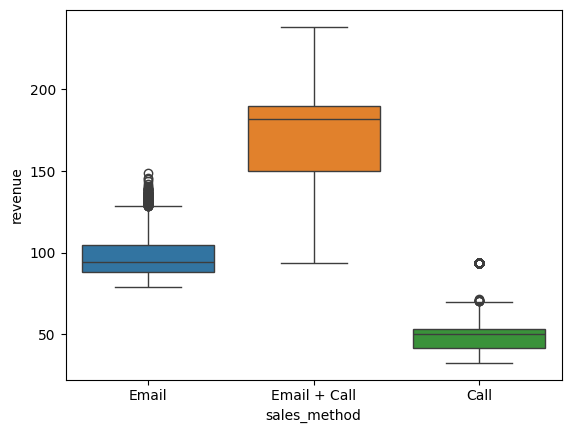

In [27]:
sns.boxplot(data=df, x='sales_method', y='revenue', hue='sales_method')
plt.show()

The line plot below show the revenue of each sale method since the first week of launching a new line of office stationery. As we can see the revenue of 'Email' was really high at about 250000 at the first week but dropped significantly to lower than 30000 in the sixth week. Meanwhile, an opposite trend was witnessed in the 'Email + Call' from about 15000 to 140000 from the first to the fifth week but slightly decreased by 20000 in the sixth one which is still the highest number in the last week and is higher than the rest methods by about 100000. The revenue of 'Call' still remained stable during the period of 6 weeks.

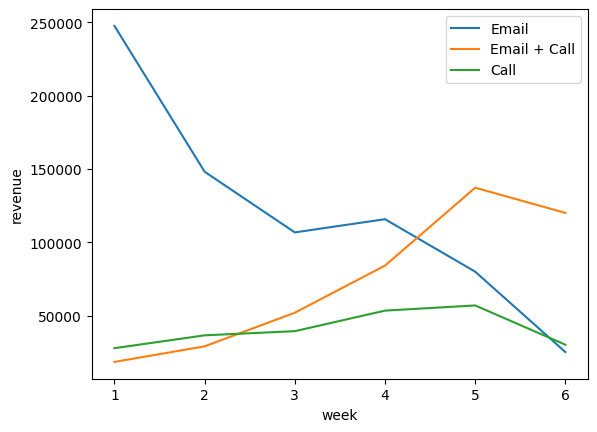

In [28]:
# Creating dataframes of each method's revenue over weeks
df_email_revenue = df[df['sales_method'] == 'Email'].groupby('week')['revenue'].sum()
df_emailwcall_revenue = df[df['sales_method'] == 'Email + Call'].groupby('week')['revenue'].sum()
df_call_revenue = df[df['sales_method'] == 'Call'].groupby('week')['revenue'].sum()

# Creating line plot
sns.lineplot(data=df_email_revenue, palette='blue', label='Email')
sns.lineplot(data=df_emailwcall_revenue, palette='black', label='Email + Call')
sns.lineplot(data=df_call_revenue, palette='orange', label='Call')
plt.legend()
plt.show()

In this graph, we can see the number of visits to the website was really high in 'Email' and 'Call' while The 'Email + Call' showed a dramatically low number.

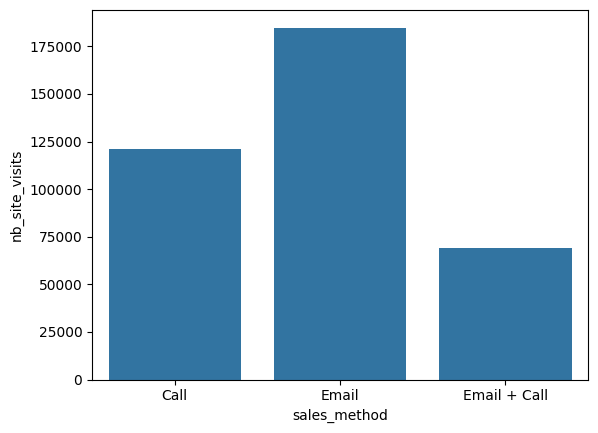

In [29]:
df_site_visits = df.groupby('sales_method')['nb_site_visits'].sum()
# plot
sns.barplot(data=df_site_visits)
plt.show()

The correltion coefficient between number of sold products and the number of website visits was moderately positive at 0.49, the more website visits the more sold products.

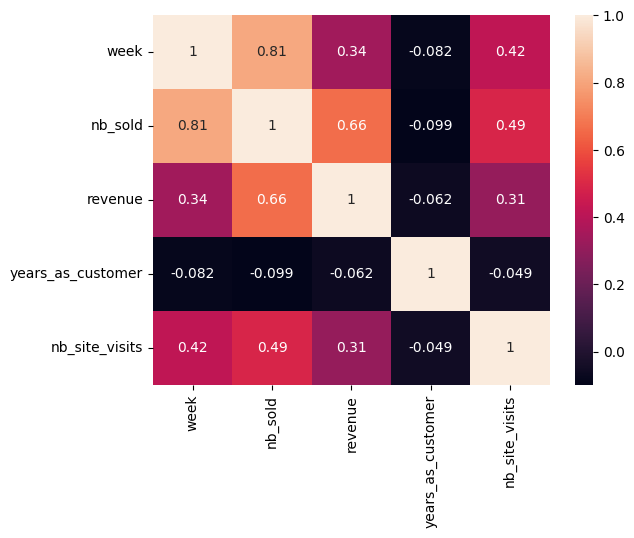

In [30]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 6. Business metrics and Recommendations

## Business Metrics
As our goal is to find the best sale method for the sale representatives, I would recommend to use **the sum of revenue in each method over weeks** to track the sale effeciency in each method in the future. 

If it continues increasing and still left other methods a significant positive range in revenue, it indicates a really good sign of the best sale method among them.

## Recommendations
In the future, I would recommend the sale representatives to follow those steps:
- Using the recommended metric to track progress to ensure whether the 'Email + Call' method is the best sale method.
- Continuing using the 'Email + Call' method because:
    + It requires a little hard work for the sale representatives, the spread of its revenue was really high and has an impressive increase since the first week.
    + It has advantages of both the 'Email' method in promoting new products and 'Call' method in giving additional information of         the product for the customers in need.
- Continuing the 'Email' method if possible as:
    + It requires very little works for the team and the revenue from this method was quite good
    + Tracking the business metrics whether it will have any improvements in the future.
- Considering not to carry out the 'Call' method anymore as it is very time-consuming and low-efficient in creating revenue for the company.
- The number of website visits of 'Email + Call' method was significantly lower than other methods, the sale representative should improve this metric by embeding a link into the emails and recommending customers to visit website in order to increase sales

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation